# <b><span style='color:#F1A424'>AutoML - Multiclass Classification </span> </b>

## <b> Problem overview:</b>
    

**Dataset used : Glass Type Dataset**

**Features**:
- `Id number`: 1 to 214 (removed from CSV file)
- `RI`: refractive index
- `Na`: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K`: Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron

**Target Variable**:
- `Type of glass`: (class attribute)
  - 1 building_windows_float_processed
  - 2 building_windows_non_float_processed
  - 3 vehicle_windows_float_processed
  - 4 vehicle_windows_non_float_processed (none in this database)
  - 5 containers
  - 6 tableware
  - 7 headlamps

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the type of glass.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.


In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','glass_types')

In [5]:
# Fetching in teradata dataframe
glass_df = DataFrame("glass_types")

In [6]:
# first 5 rows
glass_df.head()

ri,na,mg,ai,si,k,ca,ba,fe,gtype
1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31,1
1.51316,13.02,0.0,3.04,70.48,6.21,6.96,0.0,0.0,5
1.51321,13.0,0.0,3.02,70.7,6.21,6.93,0.0,0.0,5
1.51409,14.25,3.09,2.08,72.28,1.1,7.08,0.0,0.0,2
1.51514,14.85,0.0,2.42,73.72,0.0,8.39,0.56,0.0,7
1.51514,14.01,2.68,3.5,69.89,1.68,5.87,2.2,0.0,5
1.51508,15.15,0.0,2.25,73.5,0.0,8.34,0.63,0.0,7
1.51299,14.4,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6
1.51131,13.69,3.2,1.81,72.81,1.76,5.43,1.19,0.0,7
1.51115,17.38,0.0,0.34,75.41,0.0,6.65,0.0,0.0,6


In [7]:
# glass_df dataset
glass_df.shape

(214, 10)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
glass_df_sample = glass_df.sample(frac = [0.8, 0.2])

In [9]:
glass_df_sample.head()

ri,na,mg,ai,si,k,ca,ba,fe,gtype,sampleid
1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31,1,1
1.51316,13.02,0.0,3.04,70.48,6.21,6.96,0.0,0.0,5,1
1.51321,13.0,0.0,3.02,70.7,6.21,6.93,0.0,0.0,5,2
1.51409,14.25,3.09,2.08,72.28,1.1,7.08,0.0,0.0,2,2
1.51514,14.01,2.68,3.5,69.89,1.68,5.87,2.2,0.0,5,1
1.51514,14.85,0.0,2.42,73.72,0.0,8.39,0.56,0.0,7,1
1.51508,15.15,0.0,2.25,73.5,0.0,8.34,0.63,0.0,7,2
1.51299,14.4,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6,2
1.51131,13.69,3.2,1.81,72.81,1.76,5.43,1.19,0.0,7,2
1.51115,17.38,0.0,0.34,75.41,0.0,6.65,0.0,0.0,6,1


In [10]:
# Fetching train and test data
glass_df_train= glass_df_sample[glass_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
glass_df_test = glass_df_sample[glass_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
glass_df_train.shape

(171, 10)

In [12]:
# test data shape
glass_df_test.shape

(43, 10)

In [13]:
#train dataset
glass_df_train.head()

ri,na,mg,ai,si,k,ca,ba,fe,gtype
1.51316,13.02,0.0,3.04,70.48,6.21,6.96,0.0,0.0,5
1.51514,14.01,2.68,3.5,69.89,1.68,5.87,2.2,0.0,5
1.51531,14.38,0.0,2.66,73.1,0.04,9.08,0.64,0.0,7
1.51545,14.14,0.0,2.68,73.39,0.08,9.07,0.61,0.05,7
1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.0,0.0,2
1.51571,12.72,3.46,1.56,73.2,0.67,8.09,0.0,0.24,1
1.51567,13.29,3.45,1.21,72.74,0.56,8.57,0.0,0.0,1
1.51514,14.85,0.0,2.42,73.72,0.0,8.39,0.56,0.0,7
1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31,1
1.51115,17.38,0.0,0.34,75.41,0.0,6.65,0.0,0.0,6


In [14]:
# test dataset
glass_df_test.head()

ri,na,mg,ai,si,k,ca,ba,fe,gtype
1.51321,13.0,0.0,3.02,70.7,6.21,6.93,0.0,0.0,5
1.51508,15.15,0.0,2.25,73.5,0.0,8.34,0.63,0.0,7
1.51556,13.87,0.0,2.54,73.23,0.14,9.41,0.81,0.01,7
1.5159,13.24,3.34,1.47,73.1,0.39,8.22,0.0,0.0,2
1.5161,13.33,3.53,1.34,72.67,0.56,8.33,0.0,0.0,3
1.51613,13.88,1.78,1.79,73.1,0.0,8.67,0.76,0.0,7
1.51593,13.09,3.59,1.52,73.1,0.67,7.83,0.0,0.0,2
1.51409,14.25,3.09,2.08,72.28,1.1,7.08,0.0,0.0,2
1.51299,14.4,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6
1.51131,13.69,3.2,1.81,72.81,1.76,5.43,1.19,0.0,7


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance with task type 'Classification'
# Using only 'decision_forest' and 'xgboost' models from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-F1', early stopping timer threshold to 300 sec
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Classification",
             include=['decision_forest', 'xgboost'],
             stopping_metric='MICRO-F1',
             stopping_tolerance=0.60,
             max_runtime_secs=300,
             verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 171
Total Columns in the data: 10

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
gtype,INTEGER,171,0,None,0,171,0,0.0,100.0
ba,FLOAT,171,0,None,142,29,0,0.0,100.0
si,FLOAT,171,0,None,0,171,0,0.0,100.0
na,FLOAT,171,0,None,0,171,0,0.0,100.0
fe,FLOAT,171,0,None,111,60,0,0.0,100.0
k,FLOAT,171,0,None,22,149,0,0.0,100.0
mg,FLOAT,171,0,None,31,140,0,0.0,100.0
ca,FLOAT,171,0,None,0,171,0,0.0,100.0
ai,FLOAT,171,0,None,0,171,0,0.0,100.0
ri,FLOAT,171,0,None,0,171,0,0.0,100.0



Statistics of Data:


func,ri,na,mg,ai,si,k,ca,ba,fe,gtype
min,1.511,10.73,0,0.29,69.81,0,5.79,0,0,1
std,0.003,0.821,1.409,0.497,0.74,0.53,1.318,0.502,0.101,2.04
25%,1.517,12.915,2.335,1.19,72.235,0.135,8.285,0,0,1
50%,1.518,13.29,3.48,1.36,72.76,0.55,8.61,0,0,2
75%,1.519,13.8,3.6,1.62,73.06,0.61,9.36,0,0.105,3
max,1.531,17.38,4.49,3.5,75.41,6.21,14.96,3.15,0.51,7
mean,1.518,13.411,2.739,1.438,72.627,0.468,8.966,0.166,0.062,2.632
count,171,171,171,171,171,171,171,171,171,171



Target Column Distribution:


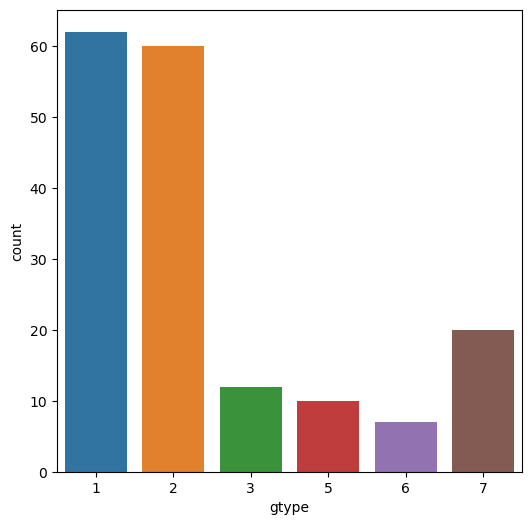

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0         ri           6.432749
1         ca           9.356725
2         ai           9.356725
3         na           3.508772
4          k           2.339181
5         fe           5.847953
6         mg          18.128655
7      gtype          11.695906
8         ba          16.959064
9         si           4.093567


ri,na,mg,ai,si,k,ca,ba,fe,gtype
1.51905,13.6,3.62,1.11,72.64,0.14,8.76,0.0,0.0,1
1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.0,0.0,2
1.51674,12.79,3.52,1.54,73.36,0.66,7.9,0.0,0.0,2
1.5169,13.33,3.54,1.61,72.54,0.68,8.11,0.0,0.0,2
1.51709,13.0,3.47,1.79,72.72,0.66,8.18,0.0,0.0,2
1.5241,13.83,2.9,1.17,71.15,0.08,10.79,0.0,0.0,2
1.52664,11.23,0.0,0.77,73.21,0.0,14.68,0.0,0.0,2
1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.0,0.12,2
1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.0,0.0,2
1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.0,0.0,1


Remaining Rows in the data: 170                                                         
Remaining Columns in the data: 10


Dataset does not contain any feature related to dates.                                   


No Missing Values Detected.                                                              


No imputation is Required.                                                               


Encoding not required.                                                                   


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


ri,na,mg,ai,si,k,ca,ba,fe,gtype,id
1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.0,0.0,2,15
1.51751,12.81,3.57,1.35,73.02,0.62,8.59,0.0,0.0,1,9
1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.0,0.22,2,17
1.52664,11.23,0.0,0.77,73.21,0.0,14.68,0.0,0.0,2,14
1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.0,0.0,2,10
1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.0,0.0,1,18
1.5169,13.33,3.54,1.61,72.54,0.68,8.11,0.0,0.0,2,13
1.5167,13.24,3.57,1.38,72.7,0.56,8.44,0.0,0.1,3,21
1.51905,13.6,3.62,1.11,72.64,0.14,8.76,0.0,0.0,1,8
1.51905,14.0,2.39,1.56,72.37,0.0,9.57,0.0,0.0,6,16


ri,na,mg,ai,si,k,ca,ba,fe,gtype,id
1.51743,13.3,3.6,1.14,73.09,0.58,8.17,0.0,0.0,1,29
1.51829,14.46,2.24,1.62,72.38,0.0,9.26,0.0,0.0,6,31
1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7,79
1.52227,14.17,3.81,0.78,71.35,0.0,9.69,0.0,0.0,1,27
1.51629,12.71,3.33,1.49,73.28,0.67,8.24,0.0,0.0,2,25
1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.0,0.21,2,122
1.51719,14.75,0.0,2.0,73.02,0.0,8.53,1.59,0.08,7,30
1.52058,12.85,1.61,2.17,72.18,0.76,9.7,0.24,0.51,5,70
1.51571,12.72,3.46,1.56,73.2,0.67,8.09,0.0,0.24,1,123
1.51926,13.2,3.33,1.28,72.36,0.6,9.14,0.0,0.11,1,125


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0         mg          18.235294
1         fe           5.882353
2         si           4.117647
3         ba          17.058824
4         ca          10.588235
5         ri           6.470588
6         ai           8.823529
7          k           2.352941
8         na           4.117647
9      gtype          11.764706


['na', 'si', 'ri', 'k', 'fe']
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711972368471442"'16


['ca', 'ai', 'mg', 'ba']
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711972471961704"'16


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711973569950769"'16
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711973102720602"'


['ri', 'ai', 'na', 'k', 'mg', 'fe', 'si', 'ca']


['ri', 'ai', 'na', 'k', 'mg', 'fe', 'si', 'ca']


id,gtype,ri,ai,na,k,mg,fe,si,ca
2,2,0.3888888888888903,0.49635036496350354,0.5217391304347824,0.5257731958762887,0.5938697318007663,0.0,0.4065934065934079,0.459259259259259
4,1,0.8777777777777682,0.051094890510948864,0.5072463768115943,0.12371134020618557,0.6513409961685823,0.12,0.3076923076923049,0.4814814814814814
5,7,0.12222222222223182,0.44525547445255476,0.7652173913043476,0.041237113402061855,0.6206896551724138,0.36,0.8461538461538449,0.6222222222222218
6,1,0.2666666666666831,0.28467153284671526,0.3710144927536231,0.577319587628866,0.6206896551724138,0.0,0.7765567765567759,0.4407407407407409
8,2,0.6333333333333292,0.49635036496350354,0.643478260869565,0.5051546391752577,0.15325670498084287,0.68,0.3076923076923049,0.9222222222222219
9,2,0.3666666666666708,0.2627737226277373,0.3971014492753622,0.6597938144329897,0.7126436781609196,0.88,0.4139194139194138,0.5925925925925928
7,1,0.27777777777779283,0.40875912408759124,0.30434782608695626,0.5979381443298969,0.6551724137931033,0.0,0.783882783882787,0.42222222222222205
3,2,1.0,0.30656934306569333,0.6579710144927536,0.08247422680412371,0.3908045977011494,0.0,0.0,0.4814814814814814
1,1,0.6555555555555487,0.27007299270073,0.617391304347826,0.09278350515463918,0.6551724137931033,0.0,0.29670329670329343,0.7555555555555555
0,1,0.3000000000000123,0.43065693430656937,0.3275362318840577,0.5876288659793814,0.636015325670498,0.0,0.6593406593406608,0.5148148148148146


id,gtype,ri,ai,na,k,mg,fe,si,ca
110,3,0.1444444444444513,0.43795620437956206,0.1739130434782608,0.5876288659793814,0.6283524904214559,0.0,0.6373626373626379,0.43333333333333296
135,1,0.3222222222222318,0.43795620437956206,0.34202898550724636,0.6597938144329897,0.6130268199233716,0.0,0.6630036630036611,0.48888888888888865
211,2,0.10000000000001233,0.5766423357664233,0.42318840579710126,0.7422680412371134,0.6436781609195402,0.0,0.7179487179487184,0.2
188,2,0.3444444444444513,-0.13868613138686126,0.6260869565217393,0.0,-0.7203065134099615,0.0,1.2087912087912123,1.3444444444444443
25,2,0.13333333333334155,0.5401459854014599,0.3333333333333335,0.6907216494845362,0.5555555555555556,0.0,0.7802197802197814,0.32592592592592584
142,1,0.7777777777777806,-0.02189781021897812,0.6289855072463769,0.1752577319587629,0.7509578544061302,0.0,0.22344322344322406,0.8814814814814814
133,3,0.17777777777778053,0.7372262773722628,0.45797101449275374,0.6185567010309279,0.6015325670498085,0.68,0.4871794871794884,0.37777777777777793
122,2,0.16666666666667077,0.635036496350365,0.3971014492753622,0.6597938144329897,0.636015325670498,0.84,0.6630036630036611,0.24814814814814778
123,1,0.06666666666668311,0.5912408759124087,0.3362318840579711,0.6907216494845362,0.6053639846743295,0.96,0.7509157509157527,0.2703703703703702
148,1,0.2888888888889026,0.39416058394160586,0.25797101449275334,0.577319587628866,0.318007662835249,0.96,0.9340659340659365,0.6296296296296297


['ri', 'na', 'mg', 'ai', 'si', 'k', 'ca', 'fe']


['r_ri', 'r_na', 'r_mg', 'r_ai', 'r_si', 'r_k', 'r_ca', 'r_fe']


id,gtype,r_ri,r_na,r_mg,r_ai,r_si,r_k,r_ca,r_fe
2,2,0.3888888888888903,0.5217391304347824,0.5938697318007663,0.49635036496350354,0.4065934065934079,0.5257731958762887,0.459259259259259,0.0
4,1,0.8777777777777682,0.5072463768115943,0.6513409961685823,0.051094890510948864,0.3076923076923049,0.12371134020618557,0.4814814814814814,0.12
5,7,0.12222222222223182,0.7652173913043476,0.6206896551724138,0.44525547445255476,0.8461538461538449,0.041237113402061855,0.6222222222222218,0.36
6,1,0.2666666666666831,0.3710144927536231,0.6206896551724138,0.28467153284671526,0.7765567765567759,0.577319587628866,0.4407407407407409,0.0
8,2,0.6333333333333292,0.643478260869565,0.15325670498084287,0.49635036496350354,0.3076923076923049,0.5051546391752577,0.9222222222222219,0.68
9,2,0.3666666666666708,0.3971014492753622,0.7126436781609196,0.2627737226277373,0.4139194139194138,0.6597938144329897,0.5925925925925928,0.88
7,1,0.27777777777779283,0.30434782608695626,0.6551724137931033,0.40875912408759124,0.783882783882787,0.5979381443298969,0.42222222222222205,0.0
3,2,1.0,0.6579710144927536,0.3908045977011494,0.30656934306569333,0.0,0.08247422680412371,0.4814814814814814,0.0
1,1,0.6555555555555487,0.617391304347826,0.6551724137931033,0.27007299270073,0.29670329670329343,0.09278350515463918,0.7555555555555555,0.0
0,1,0.3000000000000123,0.3275362318840577,0.636015325670498,0.43065693430656937,0.6593406593406608,0.5876288659793814,0.5148148148148146,0.0


id,gtype,r_ri,r_na,r_mg,r_ai,r_si,r_k,r_ca,r_fe
110,3,0.1444444444444513,0.1739130434782608,0.6283524904214559,0.43795620437956206,0.6373626373626379,0.5876288659793814,0.43333333333333296,0.0
135,1,0.3222222222222318,0.34202898550724636,0.6130268199233716,0.43795620437956206,0.6630036630036611,0.6597938144329897,0.48888888888888865,0.0
211,2,0.10000000000001233,0.42318840579710126,0.6436781609195402,0.5766423357664233,0.7179487179487184,0.7422680412371134,0.2,0.0
188,2,0.3444444444444513,0.6260869565217393,-0.7203065134099615,-0.13868613138686126,1.2087912087912123,0.0,1.3444444444444443,0.0
25,2,0.13333333333334155,0.3333333333333335,0.5555555555555556,0.5401459854014599,0.7802197802197814,0.6907216494845362,0.32592592592592584,0.0
142,1,0.7777777777777806,0.6289855072463769,0.7509578544061302,-0.02189781021897812,0.22344322344322406,0.1752577319587629,0.8814814814814814,0.0
133,3,0.17777777777778053,0.45797101449275374,0.6015325670498085,0.7372262773722628,0.4871794871794884,0.6185567010309279,0.37777777777777793,0.68
122,2,0.16666666666667077,0.3971014492753622,0.636015325670498,0.635036496350365,0.6630036630036611,0.6597938144329897,0.24814814814814778,0.84
123,1,0.06666666666668311,0.3362318840579711,0.6053639846743295,0.5912408759124087,0.7509157509157527,0.6907216494845362,0.2703703703703702,0.96
148,1,0.2888888888889026,0.25797101449275334,0.318007662835249,0.39416058394160586,0.9340659340659365,0.577319587628866,0.6296296296296297,0.96


['ri', 'na', 'mg', 'ai', 'si', 'k', 'ca', 'fe']


id,gtype,ba,ri,na,mg,ai,si,k,ca,fe
8,1,0.0,0.43638392857143365,0.5913043478260869,0.6666666666666666,0.2627737226277373,0.545787545787546,0.1443298969072165,0.5185185185185183,0.0
11,2,0.0,0.21763392857143984,0.417391304347826,0.6091954022988506,0.7591240875912408,0.5750915750915747,0.6804123711340206,0.3037037037037035,0.0
19,2,0.0,1.0,0.6579710144927536,0.3908045977011494,0.30656934306569333,0.0,0.08247422680412371,0.4814814814814814,0.0
13,2,0.0,0.1964285714285679,0.5130434782608696,0.636015325670498,0.6277372262773723,0.5091575091575112,0.7010309278350516,0.27777777777777746,0.0
12,1,0.0,0.3013392857142994,0.32463768115942016,0.6858237547892719,0.29927007299270064,0.7179487179487184,0.6288659793814433,0.4962962962962959,0.0
20,1,0.0,0.3013392857142994,0.4405797101449275,0.6168582375478928,0.3868613138686131,0.6263736263736265,0.6185567010309279,0.41851851851851846,0.0
15,2,0.0,0.1785714285714321,0.37971014492753596,0.6436781609195402,0.6496350364963502,0.7289377289377298,0.6701030927835052,0.23333333333333328,0.0
23,2,0.0,0.1785714285714321,0.35652173913043445,0.6283524904214559,0.5766423357664233,0.8095238095238103,0.6804123711340206,0.2,0.0
9,1,0.0,0.2645089285714244,0.3623188405797102,0.6475095785440612,0.43795620437956206,0.684981684981684,0.6391752577319588,0.4555555555555554,0.0
17,2,0.0,0.36495535714286576,0.3971014492753622,0.7126436781609196,0.2627737226277373,0.4139194139194138,0.6597938144329897,0.5925925925925928,0.88


id,gtype,ba,ri,na,mg,ai,si,k,ca,fe
31,6,0.0,0.35156249999999534,0.8405797101449278,0.13793103448275873,0.635036496350365,0.4505494505494485,0.0,0.7037037037037035,0.0
30,7,1.59,0.2287946428571528,0.9246376811594204,-0.7203065134099615,0.9124087591240875,0.684981684981684,0.0,0.43333333333333296,0.32
70,5,0.24,0.6071428571428642,0.3739130434782607,-0.10344827586206888,1.0364963503649633,0.3772893772893791,0.7835051546391752,0.8666666666666663,2.04
27,1,0.0,0.7957589285714306,0.7565217391304347,0.7394636015325671,0.02189781021897812,0.07326007326006936,0.0,0.8629629629629626,0.0
108,7,1.55,0.24330357142857717,0.9826086956521738,-0.7203065134099615,0.7664233576642335,0.6739926739926726,0.0,0.4629629629629626,0.0
124,2,0.0,0.08816964285714972,0.4898550724637681,0.6015325670498085,0.49635036496350354,0.7399267399267413,0.6288659793814433,0.18518518518518517,0.0
29,1,0.0,0.25558035714286886,0.5043478260869567,0.6590038314176245,0.28467153284671526,0.7106227106227124,0.5979381443298969,0.2999999999999998,0.0
125,1,0.0,0.4598214285714383,0.47536231884057945,0.5555555555555556,0.3868613138686131,0.4432234432234426,0.6185567010309279,0.6592592592592593,0.44
123,1,0.0,0.06361607142856635,0.3362318840579711,0.6053639846743295,0.5912408759124087,0.7509157509157527,0.6907216494845362,0.2703703703703702,0.96
79,7,2.88,0.35379464285715284,0.820289855072464,-0.7203065134099615,0.7810218978102189,0.6263736263736265,1.4536082474226804,-0.32962962962962983,0.0


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5']


response_column : gtype                                                                                                                               
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
Total number of models for xgboost : 2592
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : gtype
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
Total number of models for decision_forest : 108
-------------------------------------------------------------------------------------------------------------------------------------

XGBOOST_0                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


DECISIONFOREST_0                                                                                                                                                                                        
DECISIONFOREST_1                                                                          
DECISIONFOREST_2                                                                          


,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,lasso,0.529412,0.529412,0.529412,0.529412,0.429798,0.549242,0.470707,0.507843,0.529412,0.510160
1,2,decision_forest,rfe,0.529412,0.529412,0.529412,0.529412,0.426190,0.467172,0.398860,0.503782,0.529412,0.498240
2,3,xgboost,rfe,0.500000,0.500000,0.500000,0.500000,0.480952,0.478535,0.404681,0.585714,0.500000,0.494412
3,4,decision_forest,lasso,0.470588,0.470588,0.470588,0.470588,0.587037,0.511364,0.438425,0.686601,0.470588,0.446866
4,5,decision_forest,pca,0.411765,0.411765,0.411765,0.411765,0.195971,0.257576,0.220862,0.334195,0.411765,0.367441
5,6,xgboost,pca,0.323529,0.323529,0.323529,0.323529,0.129234,0.161616,0.141304,0.261560,0.323529,0.284527


In [16]:
# Fitting train data
aml.fit(glass_df_train, glass_df_train.gtype)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,lasso,0.529412,0.529412,0.529412,0.529412,0.429798,0.549242,0.470707,0.507843,0.529412,0.510160
1,2,decision_forest,rfe,0.529412,0.529412,0.529412,0.529412,0.426190,0.467172,0.398860,0.503782,0.529412,0.498240
2,3,xgboost,rfe,0.500000,0.500000,0.500000,0.500000,0.480952,0.478535,0.404681,0.585714,0.500000,0.494412
3,4,decision_forest,lasso,0.470588,0.470588,0.470588,0.470588,0.587037,0.511364,0.438425,0.686601,0.470588,0.446866
4,5,decision_forest,pca,0.411765,0.411765,0.411765,0.411765,0.195971,0.257576,0.220862,0.334195,0.411765,0.367441
5,6,xgboost,pca,0.323529,0.323529,0.323529,0.323529,0.129234,0.161616,0.141304,0.261560,0.323529,0.284527


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,lasso,0.529412,0.529412,0.529412,0.529412,0.429798,0.549242,0.470707,0.507843,0.529412,0.51016


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [19]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

xgboost lasso

 Prediction : 
   gtype   id  Prediction  Confidence_Lower  Confidence_upper
0      3  110           1             0.250             0.250
1      1  135           1             0.375             0.375
2      2  211           2             0.375             0.375
3      2  188           6             1.000             1.000
4      2   25           2             0.750             0.750
5      1  142           1             0.375             0.375
6      3  133           2             0.625             0.625
7      2  122           2             0.625             0.625
8      1  123           2             0.375             0.375
9      1  148           1             0.375             0.375

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  CLASS_4  CLASS_5  CLASS_6  Precision    Recall        F1  Support
SeqNum                                                                                                                  
2               3  CL

array([[6, 3, 1, 1, 0, 0],
       [2, 6, 0, 1, 1, 2],
       [2, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 2, 0],
       [1, 0, 0, 0, 0, 3]], dtype=int64)

In [20]:
# Printing prediction
prediction.head()

gtype,id,Prediction,Confidence_Lower,Confidence_upper
1,148,1,0.375,0.375
1,111,3,0.5,0.5
1,86,1,0.75,0.75
1,142,1,0.375,0.375
1,27,5,0.375,0.375
1,125,2,0.375,0.375
1,29,1,0.625,0.625
1,123,2,0.375,0.375
1,135,1,0.375,0.375
1,203,2,0.5,0.5


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(glass_df_test,2)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...

Updated dataset after performing target column transformation :


ri,id,ai,na,k,mg,fe,si,ca,ba,gtype
1.52777,13,0.67,12.64,0.06,0.0,0.0,72.02,14.4,0.0,2
1.52177,10,1.15,13.2,0.54,3.68,0.0,72.75,8.52,0.0,2
1.518,18,1.54,13.71,0.54,3.93,0.15,71.81,8.21,0.0,2
1.51694,8,1.31,12.86,0.61,3.58,0.0,72.61,8.79,0.0,3
1.51618,12,1.54,13.53,0.39,3.55,0.0,72.99,7.78,0.0,1
1.51618,20,1.48,13.01,0.6,3.5,0.0,72.89,8.12,0.0,2
1.51613,11,1.79,13.88,0.0,1.78,0.0,73.1,8.67,0.76,7
1.51321,19,3.02,13.0,6.21,0.0,0.0,70.7,6.93,0.0,5
1.51508,15,2.25,15.15,0.0,0.0,0.0,73.5,8.34,0.63,7
1.51779,23,0.65,13.64,0.06,3.65,0.0,73.0,8.93,0.0,3


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711974053084202"'

Updated dataset after performing Lasso feature selection:


id,ri,ai,na,k,mg,fe,si,ca,gtype
26,1.5173,2.34,14.7,0.0,0.0,0.0,73.28,8.95,7
40,1.5189,1.26,13.46,0.57,3.83,0.14,72.55,8.21,2
22,1.5187,1.56,12.93,0.58,3.66,0.12,72.51,8.55,2
38,1.5173,1.63,12.35,0.7,2.72,0.0,72.87,9.23,2
49,1.5179,1.12,12.79,0.64,3.5,0.0,73.03,8.77,1
41,1.5181,1.25,13.33,0.52,3.85,0.0,72.78,8.12,2
19,1.5132,3.02,13.0,6.21,0.0,0.0,70.7,6.93,5
30,1.5339,1.0,12.3,0.12,0.0,0.24,70.16,16.19,2
36,1.5177,1.23,12.85,0.61,3.48,0.22,72.97,8.56,1
28,1.5272,0.66,13.8,0.08,3.15,0.0,70.57,11.64,2



Updated dataset after performing scaling on Lasso selected features :


id,gtype,ri,ai,na,k,mg,fe,si,ca
19,5,-0.21111111111108508,1.656934306569343,0.417391304347826,6.402061855670103,-0.7203065134099615,0.0,-0.1648351648351665,-0.15925925925925946
17,3,0.7777777777777806,0.11678832116788322,0.76231884057971,0.2371134020618557,0.7279693486590038,1.48,0.07692307692307492,0.6592592592592593
34,1,0.444444444444439,0.3138686131386861,0.6782608695652175,0.061855670103092786,0.7088122605363985,0.0,0.3553113553113562,0.5666666666666668
38,2,0.24444444444446364,0.6423357664233575,0.22898550724637662,0.7216494845360825,0.32183908045977017,0.0,0.630036630036632,0.6925925925925925
36,1,0.2888888888889026,0.3503649635036496,0.3739130434782607,0.6288659793814433,0.6130268199233716,0.88,0.6666666666666666,0.4444444444444445
28,2,1.3444444444444266,-0.06569343065693428,0.6492753623188408,0.08247422680412371,0.4865900383141762,0.0,-0.21245421245421783,1.5851851851851853
15,7,0.0,1.094890510948905,1.0405797101449277,0.0,-0.7203065134099615,0.0,0.860805860805862,0.36296296296296277
32,6,0.5111111111111221,-0.13868613138686126,0.8695652173913045,0.0,-0.7203065134099615,0.0,0.853479853479856,1.4296296296296296
49,1,0.31111111111112205,0.27007299270073,0.35652173913043445,0.6597938144329897,0.6206896551724138,0.0,0.6886446886446895,0.5222222222222219
41,2,0.33333333333334153,0.36496350364963503,0.5130434782608696,0.5360824742268041,0.7547892720306513,0.0,0.5970695970695976,0.28148148148148106



Updated dataset after performing RFE feature selection:


id,ri,na,mg,ai,si,k,ca,fe,gtype
26,1.5173,14.7,0.0,2.34,73.28,0.0,8.95,0.0,7
38,1.5173,12.35,2.72,1.63,72.87,0.7,9.23,0.0,2
12,1.5162,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
40,1.5189,13.46,3.83,1.26,72.55,0.57,8.21,0.14,2
19,1.5132,13.0,0.0,3.02,70.7,6.21,6.93,0.0,5
30,1.5339,12.3,0.0,1.0,70.16,0.12,16.19,0.24,2
36,1.5177,12.85,3.48,1.23,72.97,0.61,8.56,0.22,1
28,1.5272,13.8,3.15,0.66,70.57,0.08,11.64,0.0,2
49,1.5179,12.79,3.5,1.12,73.03,0.64,8.77,0.0,1
41,1.5181,13.33,3.85,1.25,72.78,0.52,8.12,0.0,2



Updated dataset after performing scaling on RFE selected features :


id,gtype,r_ri,r_na,r_mg,r_ai,r_si,r_k,r_ca,r_fe
49,1,0.31111111111112205,0.35652173913043445,0.6206896551724138,0.27007299270073,0.6886446886446895,0.6597938144329897,0.5222222222222219,0.0
40,2,0.4222222222222195,0.5507246376811596,0.7471264367816092,0.3722627737226277,0.5128205128205117,0.5876288659793814,0.314814814814815,0.56
22,2,0.4,0.3971014492753622,0.6819923371647509,0.5912408759124087,0.49816849816849984,0.5979381443298969,0.4407407407407409,0.48
15,7,0.0,1.0405797101449277,-0.7203065134099615,1.094890510948905,0.860805860805862,0.0,0.36296296296296277,0.0
38,2,0.24444444444446364,0.22898550724637662,0.32183908045977017,0.6423357664233575,0.630036630036632,0.7216494845360825,0.6925925925925925,0.0
12,1,0.12222222222223182,0.5710144927536229,0.639846743295019,0.5766423357664233,0.6739926739926726,0.4020618556701031,0.15555555555555553,0.0
26,7,0.24444444444446364,0.9101449275362318,-0.7203065134099615,1.1605839416058392,0.7802197802197814,0.0,0.5888888888888885,0.0
43,7,0.18888888888889027,0.8695652173913045,-0.7203065134099615,0.8978102189781021,0.783882783882787,0.0,0.4296296296296293,0.28
36,1,0.2888888888889026,0.3739130434782607,0.6130268199233716,0.3503649635036496,0.6666666666666666,0.6288659793814433,0.4444444444444445,0.88
28,2,1.3444444444444266,0.6492753623188408,0.4865900383141762,-0.06569343065693428,-0.21245421245421783,0.08247422680412371,1.5851851851851853,0.0



Updated dataset after performing scaling for PCA feature selection :


id,gtype,ba,ri,na,mg,ai,si,k,ca,fe
19,5,0.0,-0.21651785714283633,0.417391304347826,-0.7203065134099615,1.656934306569343,-0.1648351648351665,6.402061855670103,-0.15925925925925946,0.0
49,1,0.0,0.30803571428572224,0.35652173913043445,0.6206896551724138,0.27007299270073,0.6886446886446895,0.6597938144329897,0.5222222222222219,0.0
41,2,0.0,0.3303571428571482,0.5130434782608696,0.7547892720306513,0.36496350364963503,0.5970695970695976,0.5360824742268041,0.28148148148148106,0.0
17,3,0.0,0.7767857142857161,0.76231884057971,0.7279693486590038,0.11678832116788322,0.07692307692307492,0.2371134020618557,0.6592592592592593,1.48
26,7,0.66,0.2410714285714445,0.9101449275362318,-0.7203065134099615,1.1605839416058392,0.7802197802197814,0.0,0.5888888888888885,0.0
43,7,1.57,0.18526785714285493,0.8695652173913045,-0.7203065134099615,0.8978102189781021,0.783882783882787,0.0,0.4296296296296293,0.28
15,7,0.63,-0.004464285714290139,1.0405797101449277,-0.7203065134099615,1.094890510948905,0.860805860805862,0.0,0.36296296296296277,0.0
32,6,0.0,0.5089285714285803,0.8695652173913045,-0.7203065134099615,-0.13868613138686126,0.853479853479856,0.0,1.4296296296296296,0.0
40,2,0.0,0.4196428571428518,0.5507246376811596,0.7471264367816092,0.3722627737226277,0.5128205128205117,0.5876288659793814,0.314814814814815,0.56
22,2,0.0,0.39732142857142594,0.3971014492753622,0.6819923371647509,0.5912408759124087,0.49816849816849984,0.5979381443298969,0.4407407407407409,0.48



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,gtype
0,26,0.060046,-0.381494,0.650790,-0.508790,1.168159,-0.349779,7
1,17,0.808718,1.156366,0.094365,0.585575,-0.020905,-0.030325,3
2,40,-0.053779,0.355302,-0.049883,0.278843,-0.090635,0.070310,2
3,19,-3.891686,0.608674,-3.123934,0.921346,1.805266,-2.621225,5
4,38,-0.283859,-0.036182,-0.236158,-0.329118,0.285683,-0.162413,2
5,49,-0.184570,-0.034589,-0.236548,-0.209430,-0.176862,-0.029804,1
6,36,-0.156769,0.734121,0.051665,0.089873,-0.032720,0.022464,1
7,15,-0.137873,-0.430403,0.850870,-0.424799,1.013378,-0.427945,7
8,43,0.039169,-0.080830,0.686795,-0.437155,0.956706,-0.362252,7
9,34,0.417004,-0.250718,0.060094,0.068905,-0.152856,0.017668,1


Data Transformation completed.
decision_forest rfe

 Prediction : 
   gtype  id  prediction   prob
0      1  49           1  0.625
1      2  38           2  0.375
2      1  12           2  0.500
3      7  15           2  0.500
4      3  17           1  0.625
5      1  34           1  0.500
6      5  19           2  0.625
7      2  30           1  0.250
8      1  36           1  0.625
9      2  28           1  0.375

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  CLASS_4  CLASS_5  CLASS_6  Precision    Recall        F1  Support
SeqNum                                                                                                                  
5               7  CLASS_6        0        0        0        0        0        0   0.000000  0.000000  0.000000        9
2               3  CLASS_3        0        0        2        0        0        0   1.000000  0.400000  0.571429        5
3               5  CLASS_4        0        0        0        1        0 

array([[7, 1, 0, 0, 0, 0],
       [7, 9, 0, 0, 0, 0],
       [2, 1, 2, 0, 0, 0],
       [0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [1, 3, 0, 0, 5, 0]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

gtype,id,prediction,prob
1,36,1,0.625
1,29,1,0.5
1,48,1,0.5
1,14,1,0.5
2,30,1,0.25
2,39,1,0.375
1,49,1,0.625
1,12,2,0.5
1,52,1,0.375
1,34,1,0.5


In [23]:
remove_context()

True